<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231011/%E5%9F%BA%E7%A4%8E%E9%9B%86%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第3回（2023/10/11）

#データ分析の流れ

データ分析の基本的なステップ
1. 目的設定
1. データ収集
1. データの前処理
1. データ探索
1. モデル構築
1. レポート



# 本日の講義の資料

以下のサイトに保存してある。

https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231011

#準備
データ分析に必要なPythonライブラリー（モジュール）のインストールと読み込みを施します。


*   numpy：数値計算
*   pandas：主にデータ加工
*   matplotlib：グラフを作成
*   japanize_matplotlib：日本語を表示
*   seaborn：グラフ作成



In [ ]:
!pip install japanize-matplotlib

In [ ]:

import numpy as np
import pandas as pd
# from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

### ドライブのマウント
1. Colabにて、左端のフォルダーのアイコンをクリックし、ファイルメニューを開く。

1. マウントアイコンをクリックし Google Driveをマウントする。

1. drive の中の「MyDrive」が Google Drive のマイドライブとなる。

### ファイルのGoogle Drive へのアップロード
1. Google Drive で適当なフォルダーを作成
2. PCのファイルをドラッグ＆ドロップでアップロードする。  
あるいは、Google Driveで右クリックでメニューを開き、ファイルのアップロードを選択してもアップロードが可能である。

### Colabで操作
1. Driveメニューで目的のファイルにマウスを合わせ、ファイル名の右にある縦3つの「・」部分をクリックして「パスをコピー」を選択する。

1. 以下のPythonコードの 3行目を先ほどコピーしたパスに変更する。ctrl+v でペーストされる。

# データをファイルから読み込む

## 本日の講義で使うデータの説明

データの定義 (各列の説明)


列名 | 型 | 説明
--   | -- | --
顧客ID | 数値（整数） |
性別	 | カテゴリ型 |
年齢	 | 数値（整数）|
職業	 | カテゴリ型|
年収	 | 数値（整数）|
スマホの所有	| カテゴリ型 |
スマホ利用時間	| 数値（実数）| 1日の平均使用時間
Aの利用回数	|  数値（整数）|
Bの利用回数 |  数値（整数） |


## データのダウンロード

以下のサイト  

https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231011

にアクセスし、エクセルファイル（customer_data.xlsx）をPCにダウンロードする。

## 環境の準備（先週の講義で説明した部分）


### ドライブのマウント
1. Colabにて、左端のフォルダーのアイコンをクリックし、ファイルメニューを開く。

1. マウントアイコンをクリックし Google Driveをマウントする。

1. drive の中の「MyDrive」が Google Drive のマイドライブとなる。

### ファイルのGoogle Drive へのアップロード
1. Google Drive で適当なフォルダーを作成
2. PCのファイルをドラッグ＆ドロップでアップロードする。  
あるいは、Google Driveで右クリックでメニューを開き、ファイルのアップロードを選択してもアップロードが可能である。

### Colabで操作
1. Driveメニューで目的のファイルにマウスを合わせ、ファイル名の右にある縦3つの「・」部分をクリックして「パスをコピー」を選択する。

1. コードセルの中での ctrl+v でファイルパスがペーストされる。

## ファイルを読み込むための Pythonプログラム

エクセルファイルをPython環境に読み込むためにPandasの
read_excel()というメソッドを使う

In [32]:
# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/customer_data.xlsx'

# data という変数に読み込む
data = pd.read_excel(file_path)

## 行数と列数表示

In [33]:
print( data.shape )

(500, 9)


# データを表示
変数に読み込んデータの内容を表示させる


In [34]:
# データの最初の10行を表示する
data.head(10)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
0,81336944,男性,NaN,会社員,393,はい,1.67,1.0,12
1,41990933,女性,51.0,NaN,450,はい,2.44,0.0,11
2,84494791,男性,45.0,会社員,497,はい,0.69,1.0,21
3,29406622,女性,27.0,公務員,313,はい,1.40,NaN,8
4,20205360,女性,61.0,会社員,292,はい,1.77,2.0,24
5,55928989,男性,39.0,公務員,317,はい,1.60,1.0,11
6,46119309,女性,12.0,学生,0,いいえ,0.00,4.0,8
7,81075284,男性,12.0,学生,0,いいえ,0.00,11.0,13
8,39537381,男性,16.0,その他,214,はい,1.14,13.0,19
9,41429479,男性,59.0,公務員,935,いいえ,0.00,3.0,13


NaNと表示されているのは数値が入力されいないという意味で,
 **欠損値**
 と呼ぶ。


In [35]:
# 最後の 5 行を表示する
data.tail()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
495,45099496,男性,45.0,公務員,411,はい,2.94,6.0,19
496,30507179,男性,18.0,学生,215,はい,2.01,12.0,8
497,30507179,男性,18.0,学生,215,はい,2.01,12.0,8
498,59997136,男性,65.0,公務員,556,いいえ,0.00,2.0,12
499,99854703,NaN,26.0,会社員,290,はい,1.28,9.0,18


#データの概要を確認する


*   レコード数
*   カラム（項目）数
*   各カラムの属性



In [ ]:
#データの全体概要を表示
data.info()

### 基本的な統計量の表示

数値型の列に対しては、統計量として以下の数値を確認することができる。
* データ個数
* 平均
* 標準偏差
* 最小値
* 第一四分位数
* 第二四分位数
* 第三四分位数
* 最大値

また、カテゴリ型のデータに対しては、
* データ個数
* ユニーク数
* 最頻値
* 最頻値のデータ数

In [ ]:
# 数値型の変数だけが表示される
data.describe()

In [53]:
# カテゴリ型
data.describe(include='object')

,性別,職業,スマホの所有
count,496,498,499
unique,2,4,2
top,男性,その他,はい
freq,349,152,433


# データクレンジング

## 欠損値の処理

In [18]:
# 欠損値の個数を調べる
# data という変数に読み込む
# data = pd.read_excel(file_path)
data.isnull().sum()

顧客ID       0
性別         3
年齢         4
職業         1
年収         0
スマホの所有     0
スマホ利用時間    0
Aの利用回数     1
Bの利用回数     0
dtype: int64

### 欠損値のあるレコードを削除

In [ ]:
data_dropped = data.dropna()

#data.dropna(inplace=True)

print(data_dropped.isnull().sum())
data_dropped.info()

変数 data は値が変化しない（元の状態）

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     499 non-null    int64  
 1   性別       496 non-null    object 
 2   年齢       495 non-null    float64
 3   職業       498 non-null    object 
 4   年収       499 non-null    int64  
 5   スマホの所有   499 non-null    object 
 6   スマホ利用時間  499 non-null    float64
 7   Aの利用回数   498 non-null    float64
 8   Bの利用回数   499 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 39.0+ KB


In [24]:
# Or drop them entirely (use sparingly)

# data という変数に読み込む
data = pd.read_excel(file_path)
# print( data.isnull().sum() )
data.dropna(inplace=True)
print( data.isnull().sum() )


顧客ID       0
性別         0
年齢         0
職業         0
年収         0
スマホの所有     0
スマホ利用時間    0
Aの利用回数     0
Bの利用回数     0
dtype: int64


### 数値で置き換える場合

In [45]:
# data = pd.read_excel(file_path)
# スマホ利用時間の欠損値を平均値で補完
data['スマホ利用時間'].fillna(data['スマホ利用時間'].mean(), inplace=True)

# 年収の欠損値を0で補完
data['年収'].fillna(0, inplace=True)


## 異常値の削除

In [31]:
# 年齢が80歳以上のレコードのインデックスを取得
indices_to_drop = data[data['年齢'] >= 80].index

#
# indices_tp_drop = data[data['年齢'] >= 80  & (data['年齢'] < 0)].index

# 指定したインデックスのレコードを削除
# data.drop(indices_to_drop, inplace=True)
data_dropped = data.drop(indices_to_drop)

## 重複レコードの削除

In [ ]:
# data = pd.read_excel(file_path)
data.tail()

In [ ]:
data.drop_duplicates(inplace=True)
data.tail()

# 基礎集計


##カウント

In [40]:
# data = pd.read_excel(file_path)
# print( data['職業'].unique() )
print( data['職業'].value_counts())
# print( data['性別'].value_counts())

#print( data['スマホの所有'].value_counts())

その他    152
会社員    141
公務員    136
学生      70
Name: 職業, dtype: int64


## 集計

In [ ]:
selected_data = data[['性別', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]

# 性別ごとに平均を計算
# average_by_gender =
selected_data.groupby('性別').mean()


In [ ]:
selected_data = data[['性別', '職業', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby('性別').median()

In [78]:
selected_data = data[['性別', '職業','年齢']]
selected_data.groupby(['性別','職業']).agg(['min', 'max', 'mean'])

年齢                 
         min   max       mean
性別 職業                        
女性 その他  14.0  64.0  38.627451
   会社員  19.0  64.0  44.652174
   公務員  19.0  65.0  42.027778
   学生   10.0  22.0  14.615385
男性 その他  14.0  65.0  38.850000
   会社員  20.0  65.0  44.711111
   公務員  19.0  65.0  43.875000
   学生   10.0  24.0  15.824561

In [ ]:
data.groupby(['性別','職業']).mean()

# ヒストグラムの表示

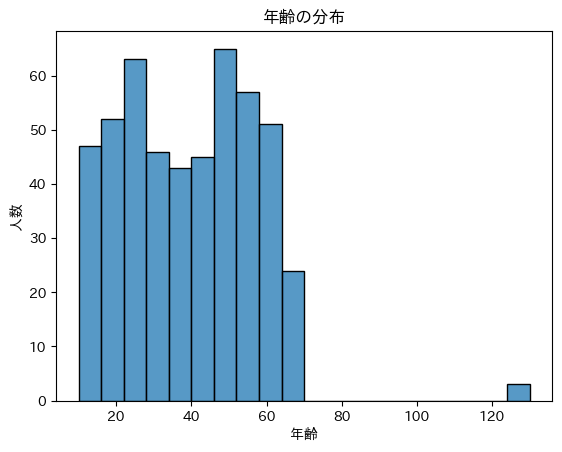

In [68]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

data = pd.read_excel(file_path)

# 年齢のデータを取得
ages = data['年齢']

# ヒストグラムを描画
sns.histplot(ages, bins=20, kde=False)
plt.title('年齢の分布')
plt.xlabel('年齢')
plt.ylabel('人数')
plt.show()

In [70]:
# 年齢が80歳以上のレコードのインデックスを取得
indices_to_drop = data[data['年齢'] >= 80].index

# 指定したインデックスのレコードを削除
data.drop(indices_to_drop, inplace=True)


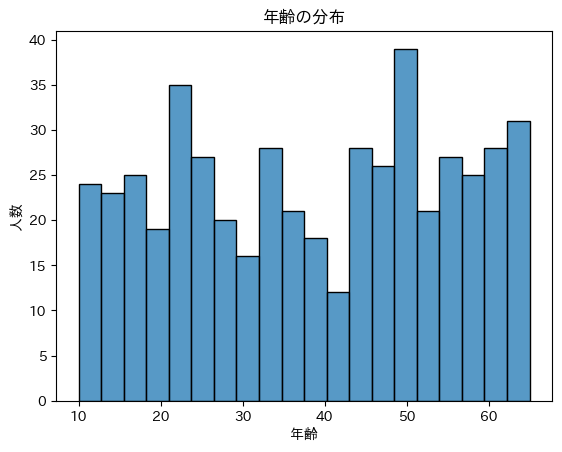

In [71]:
# 年齢のデータを取得
ages = data['年齢']

# ヒストグラムを描画
sns.histplot(ages, bins=20, kde=False)
plt.title('年齢の分布')
plt.xlabel('年齢')
plt.ylabel('人数')
plt.show()

# 散布図の表示

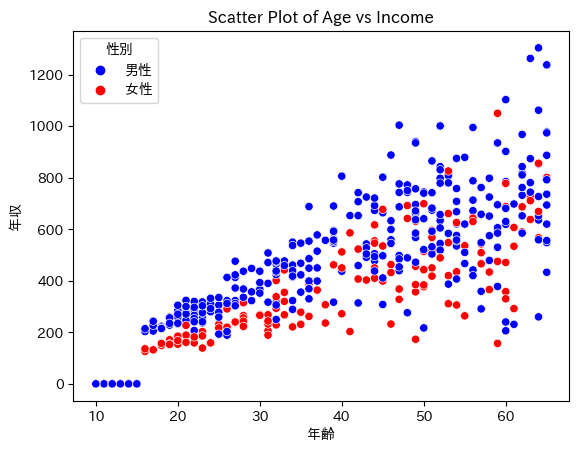

In [72]:
# Plot scatter plot for Age vs Income using seaborn
sns.scatterplot(data=data, x='年齢', y='年収', hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.title('Scatter Plot of Age vs Income')
plt.show()

# 散布図行列表示

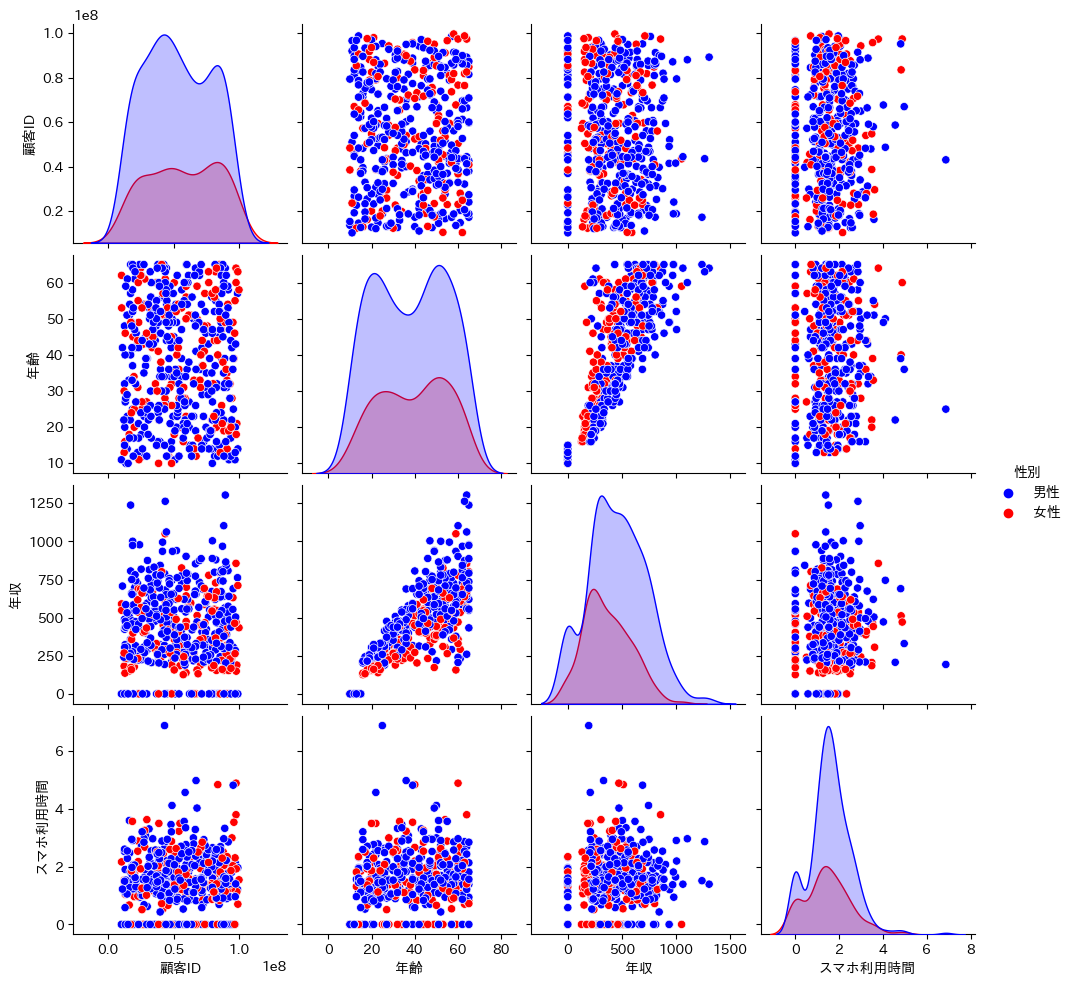

In [73]:

# Let's bring in the scripting interface
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
# sns.set(font='IPAexGothic')

# sns.pairplot( data )
# sns.pairplot( data.iloc[:,0:7] )
sns.pairplot( data.iloc[:,0:7], hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.show()

# その他

In [29]:
import pandas as pd

data = pd.read_excel(file_path)
data.head()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
0,81336944,男性,NaN,会社員,393,はい,1.67,1.0,12
1,41990933,女性,51.0,NaN,450,はい,2.44,0.0,11
2,84494791,男性,45.0,会社員,497,はい,0.69,1.0,21
3,29406622,女性,27.0,公務員,313,はい,1.40,NaN,8
4,20205360,女性,61.0,会社員,292,はい,1.77,2.0,24


In [30]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

breast_cancer_data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
Y = pd.Series(breast_cancer.target)
breast_cancer_data['target'] = Y